In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
# 폰트 경로와 이름 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 예시: Windows Malgun Gothic
font_name = fm.FontProperties(fname=font_path).get_name()

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [29]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### 총 데이터 수 : 299개, 결측치는 없음
 - 카테고리 변수
    1. anaemia, diabetes, high_blood_pressure, sex, smoking은 이진형
 - 연속형 변수
    1. age : 40 ~ 95세, 평균은 약 60, 중앙값은 60, 표준편차는 11.89로 분포가 넓게 퍼져있음
    2. creatinine_phosphokinase : 23 ~ 7861, 평균은 581.8, 표준편차는 970.28로 수치가 매우 크게 퍼져 있음, 이상치가 있을 가능성이 높음
    3. ejection_fraction : 14 ~ 80, 평균은 38.08, 값이 낮을수록 심장이 혈액을 제대로 내보내지 못하는 상태 -> 상관관계가 클 가능성이 높음
    4. platelets : 25,100 ~ 850,000, 평균은 263,358, 최소값과 최대값의 차이가 크기 때문에 이상치가 있을 가능성 있음
    5. serum_creatinine : 0.5 ~ 9.4, 평균은 1.39, 값이 높을수록 신장 기능 저하와 관련되어 있음 -> 상관관계가 클 가능성이 높음
    6. serum_sodium : 113 ~ 148, 평균은 136.62, 값이 낮을수록 심부전이 심각할 수 있음 -> 상관관계가 클 가능성이 높음

<Axes: >

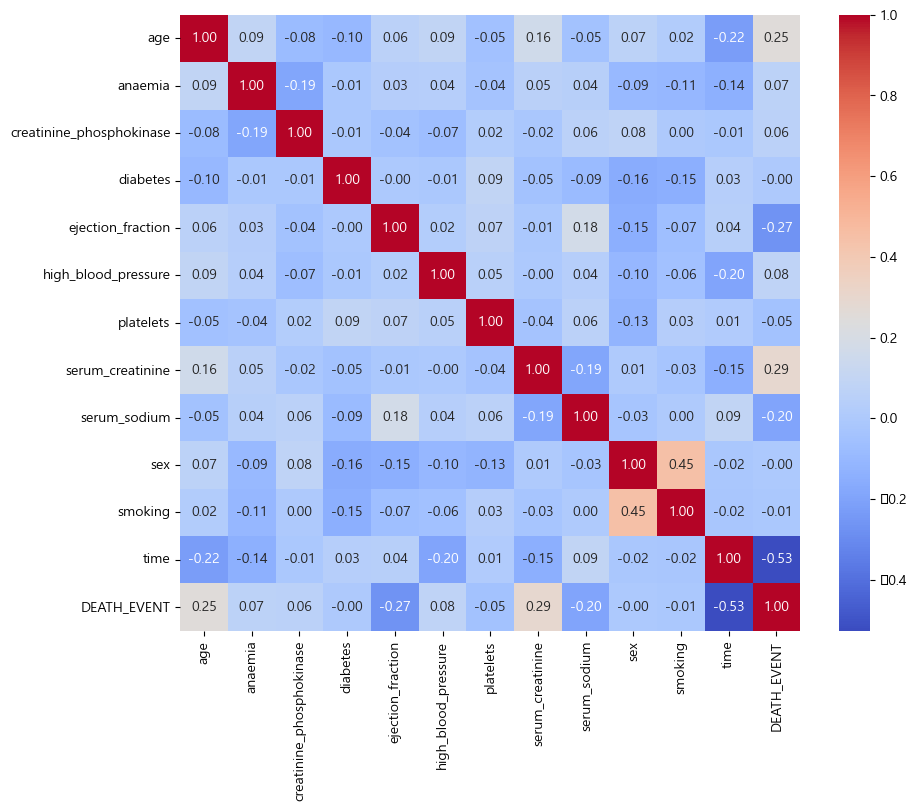

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt='.2f')

 - DEATH_EVENT와의 상관관계 파악
  1. age와 약한 음의 상관관계
  2. ejection_fraction과 약한 음의 상관관계
  3. serum_creatinine과 약항 양의 상관관계
  4. time과 강한 음의 상관관계

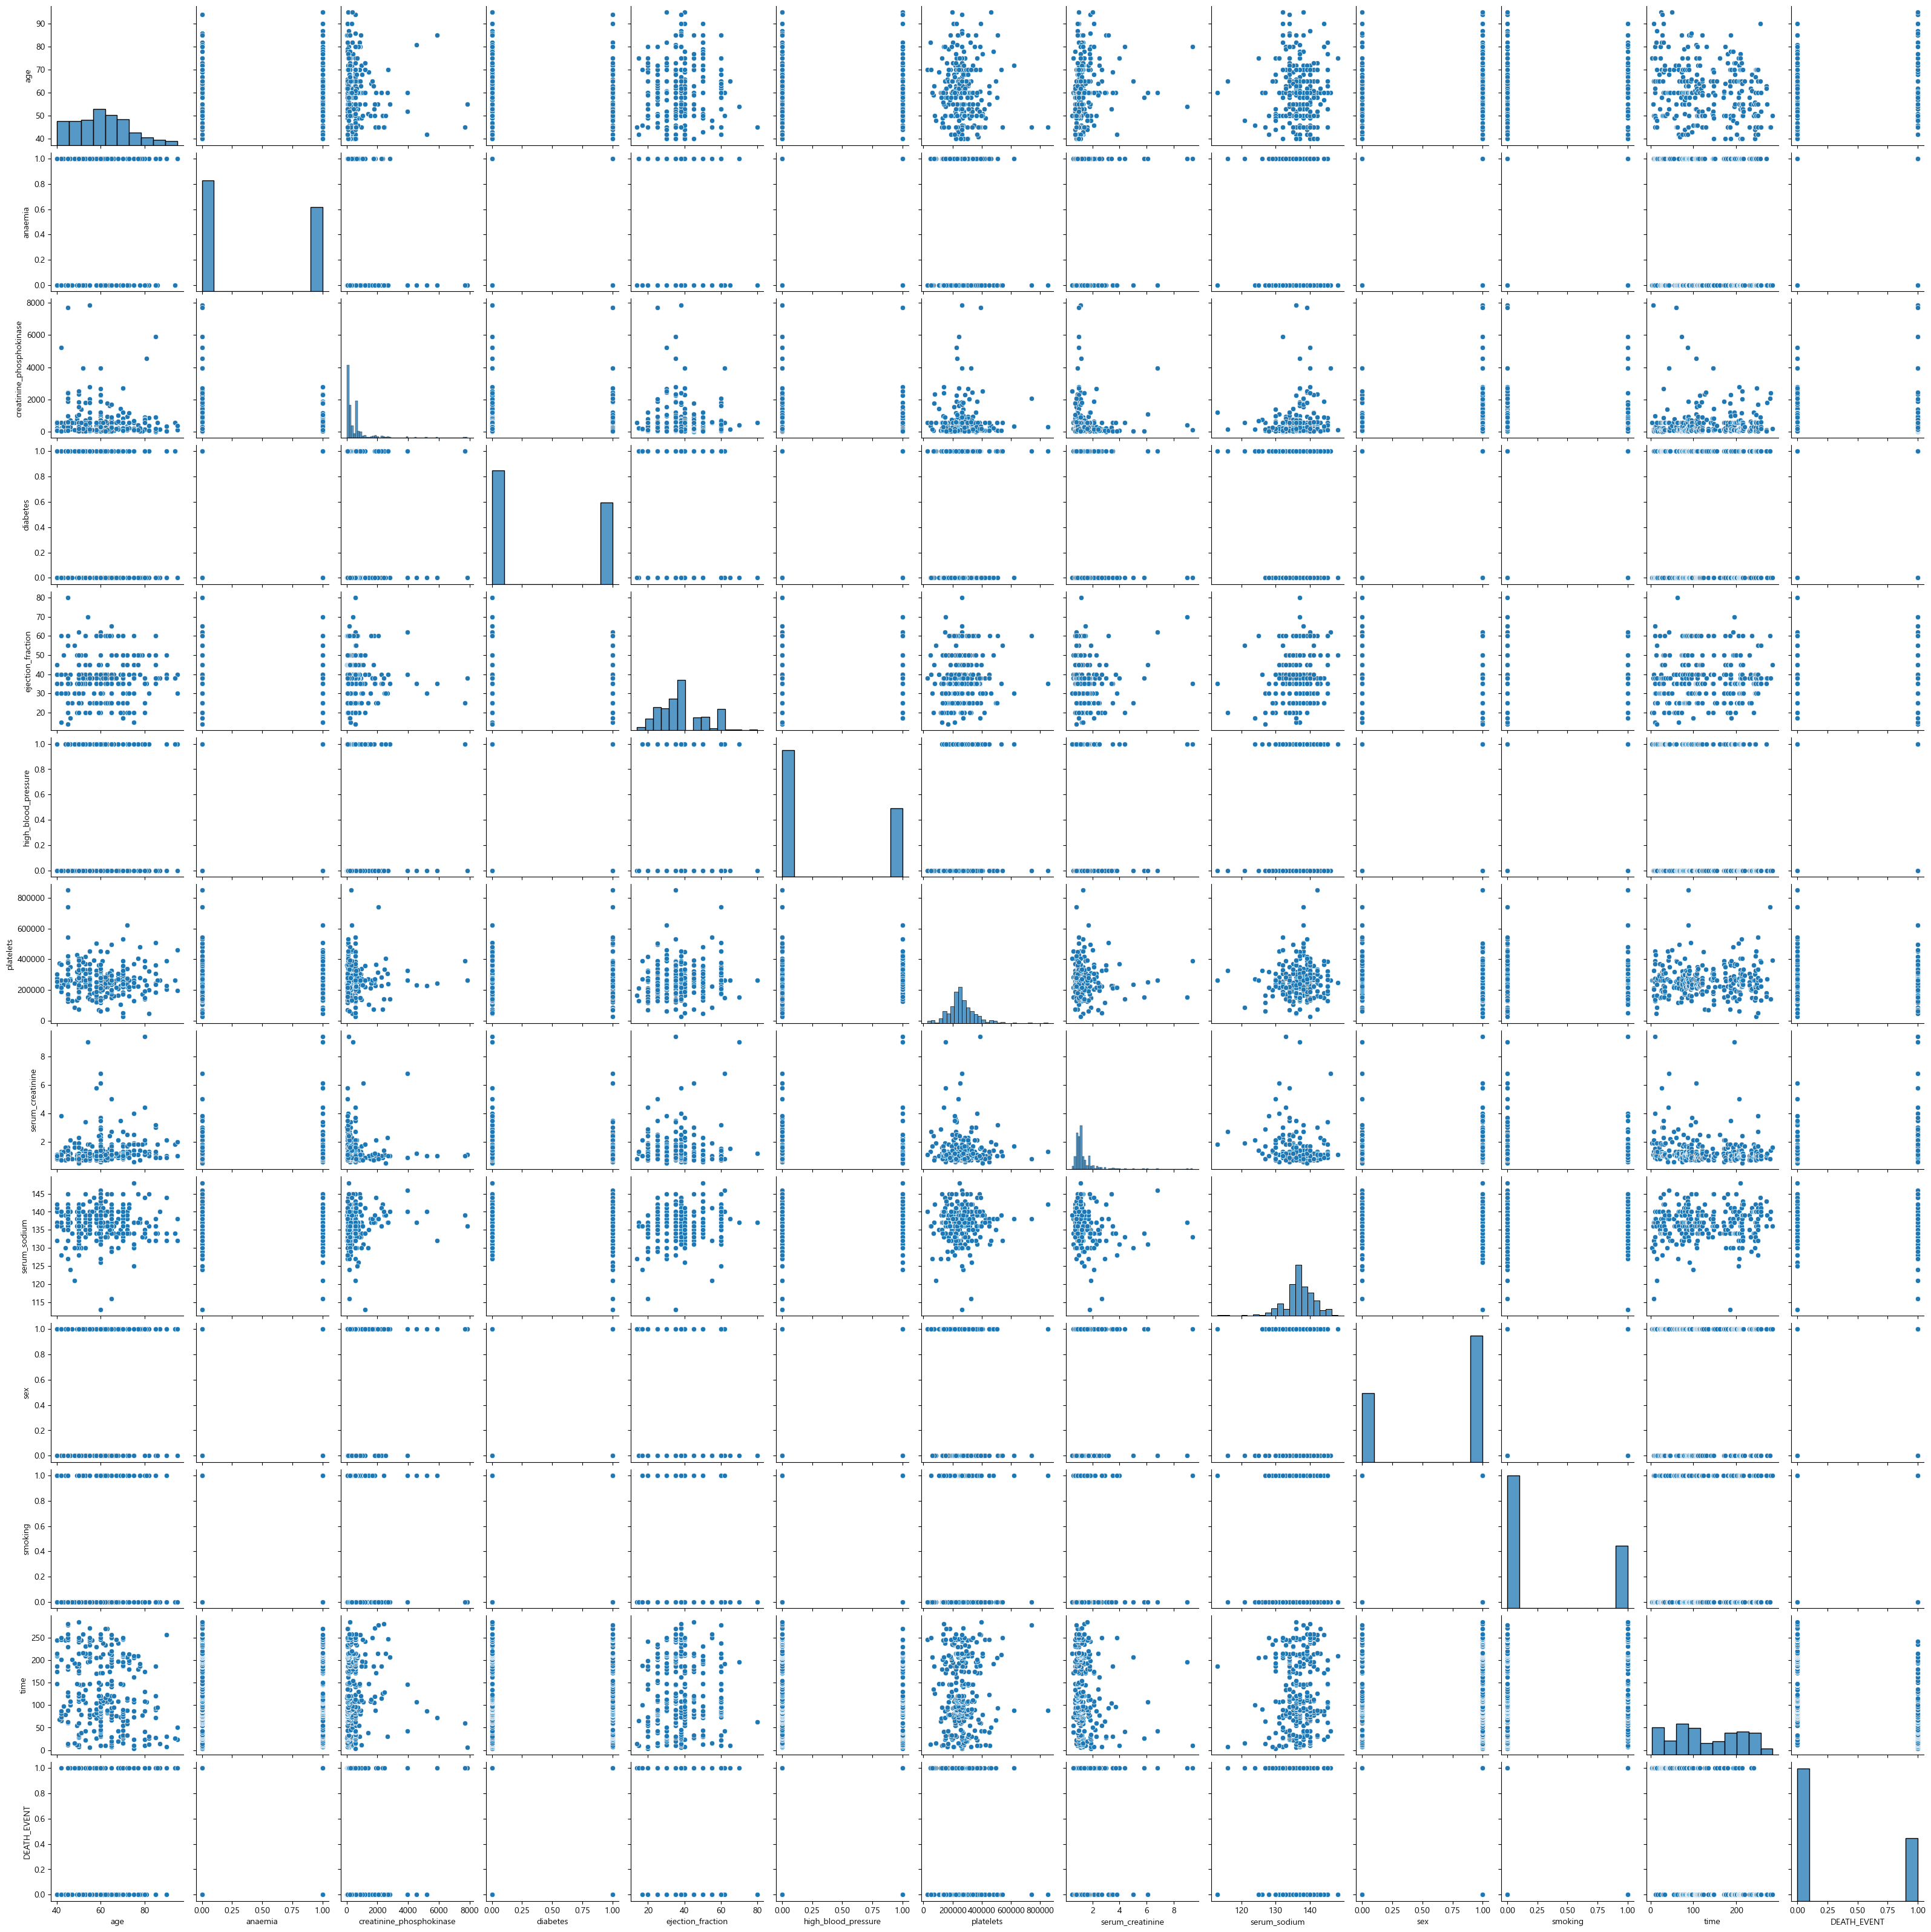

In [31]:
sns.pairplot(data)
plt.show()

 - DEATH_EVENT와의 상관관계 파악
  1. time과 DEATH_EVENT의 관계가 가장 명확하게 보임
  2. age와 serum_creatinine이 DEATH_EVENT와 약한 양의 관계를 보임
  3. ejection_fraction이 DEATH_EVENT와 약한 음의 관계를 보임


VIF 분석 결과:
                    Variable        VIF
8               serum_sodium  59.151991
0                        age  29.114744
4          ejection_fraction  12.081364
6                  platelets   8.641813
11                      time   4.351441
9                        sex   3.795155
7           serum_creatinine   2.919913
1                    anaemia   1.909994
10                   smoking   1.892753
3                   diabetes   1.789419
5        high_blood_pressure   1.646044
2   creatinine_phosphokinase   1.448473


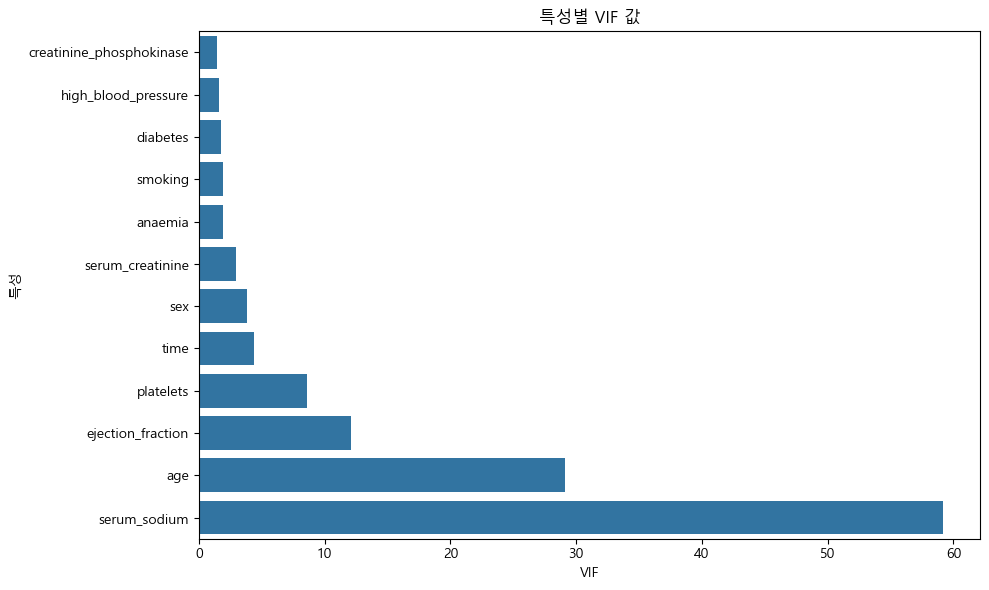


VIF가 5보다 큰 특성들:
            Variable        VIF
0                age  29.114744
4  ejection_fraction  12.081364
6          platelets   8.641813
8       serum_sodium  59.151991


In [32]:
# 다중공선성 확인을 위한 VIF 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 데이터 준비
X = data.drop('DEATH_EVENT', axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print("\nVIF 분석 결과:")
print(vif_data.sort_values('VIF', ascending=False))

# VIF 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data.sort_values('VIF', ascending=True))
plt.title('특성별 VIF 값')
plt.xlabel('VIF')
plt.ylabel('특성')
plt.tight_layout()
plt.show()

# VIF가 5보다 큰 특성들 출력
high_vif = vif_data[vif_data['VIF'] > 5]
if not high_vif.empty:
    print("\nVIF가 5보다 큰 특성들:")
    print(high_vif)
else:
    print("\nVIF가 5보다 큰 특성이 없습니다.")

- serum_sodium의 다중공선성이 특히 높으므로 의료적인 관점에서 신장 기능을 더 잘 나타내는 serum_creatinine를 놔두고, serum_sodium을 제거하는 방향으로 진행

In [33]:
data = data.drop("serum_sodium", axis=1)

creatinine_phosphokinase열의 이상치 개수: 29


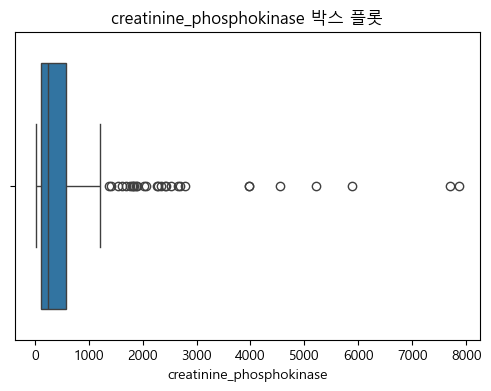

platelets열의 이상치 개수: 21


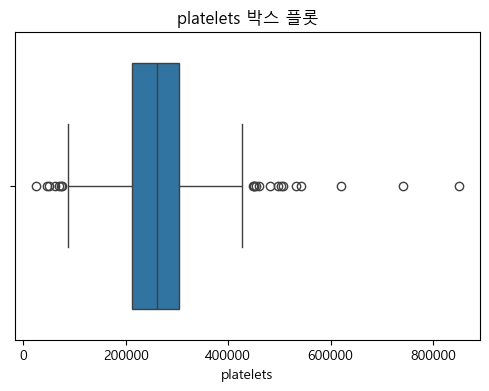

In [34]:
# creatinine_phosphokinase, platelets의 이상치 탐색
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib 설정 변경
plt.rc('font', family=font_name)

target_columns = ["creatinine_phosphokinase","platelets"]

# IQR 확인
def check_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 만든 함수를 이용하여 이상치 탐색
for column in target_columns:
    outliers = check_iqr(data, column)
    print(f'{column}열의 이상치 개수: {len(outliers)}')
    # 시각화
    plt.figure(figsize=(6,4))
    sns.boxplot(x = data[column])
    plt.title(f"{column} 박스 플롯")
    plt.show()

In [ ]:
# 이상치 처리 방법 추가
from scipy import stats

def remove_outliers(df, columns, z_threshold=3):
    df_clean = df.copy()
    for col in columns:
        z_scores = stats.zscore(df_clean[col])
        df_clean = df_clean[abs(z_scores) < z_threshold]
    return df_clean

# 특성 선택을 위한 상관관계 기반 필터링
def select_features(df, target, threshold=0.1):
    correlations = df.corr()[target].abs()
    selected_features = correlations[correlations > threshold].index.tolist()
    return selected_features

In [ ]:
# 이상치가 있을 가능성이 높은 컬럼들
outlier_columns = [
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine'
]

# 이상치 처리
df_clean = remove_outliers(data, outlier_columns, z_threshold=3)

# 처리 전후 데이터 크기 비교
print("원본 데이터 크기:", data.shape)
print("이상치 처리 후 데이터 크기:", df_clean.shape)

# 처리 전후 통계값 비교
print("\n이상치 처리 전:")
print(data[outlier_columns].describe())
print("\n이상치 처리 후:")
print(df_clean[outlier_columns].describe())

##### 데이터가 의료 데이터인 경우 비정상적인 이상치일지라도 맞는 값일 가능성이 있음
 - RobustScaler를 통해 스케일링 진행

In [35]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
data_scaled = data.copy()
data_scaled[target_columns] = rs.fit_transform(data[target_columns])

 - 학습을 위한 데이터 분할

In [36]:
x = data_scaled.drop("DEATH_EVENT", axis=1)
y = data_scaled["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

- 각각의 모델 학습 진행

In [37]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

SGDmodel = SGDClassifier()
SGDmodel.fit(X_train, y_train)

KNmodel = KNeighborsClassifier()
KNmodel.fit(X_train, y_train)

DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)

RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

- 각 모델 예측 수행

In [38]:
LRpred = LRmodel.predict(X_test)
SGDpred = SGDmodel.predict(X_test)
KNpred = KNmodel.predict(X_test)
DTpred = DTmodel.predict(X_test)
RFpred = RFmodel.predict(X_test)

- 각 모델 평가

Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



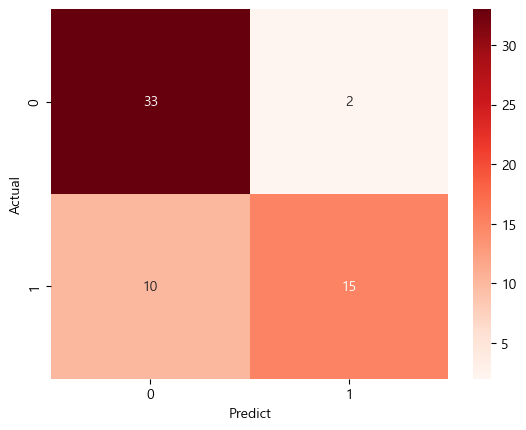

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression:")
print(classification_report(y_test, LRpred))
sns.heatmap(confusion_matrix(y_test, LRpred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Stochastic Gradient Descent:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



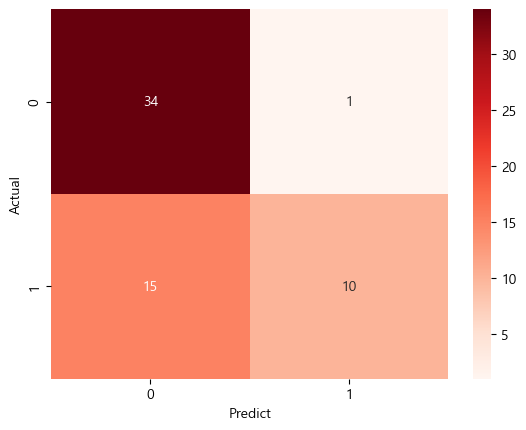

In [46]:
print("Stochastic Gradient Descent:")
print(classification_report(y_test, SGDpred))
sns.heatmap(confusion_matrix(y_test, SGDpred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



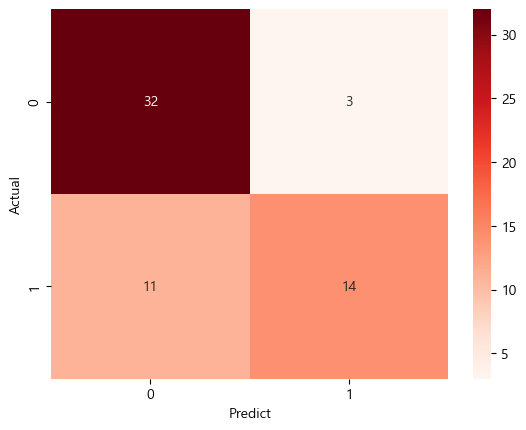

In [47]:
print("K-Nearest Neighbors:")
print(classification_report(y_test, KNpred))
sns.heatmap(confusion_matrix(y_test, KNpred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.60      0.48      0.53        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.65      0.64        60



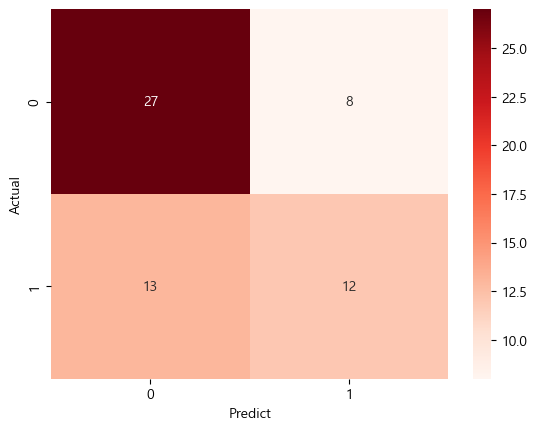

In [48]:
print("Decision Tree:")
print(classification_report(y_test, DTpred))
sns.heatmap(confusion_matrix(y_test, DTpred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        35
           1       0.68      0.52      0.59        25

    accuracy                           0.70        60
   macro avg       0.70      0.67      0.68        60
weighted avg       0.70      0.70      0.69        60



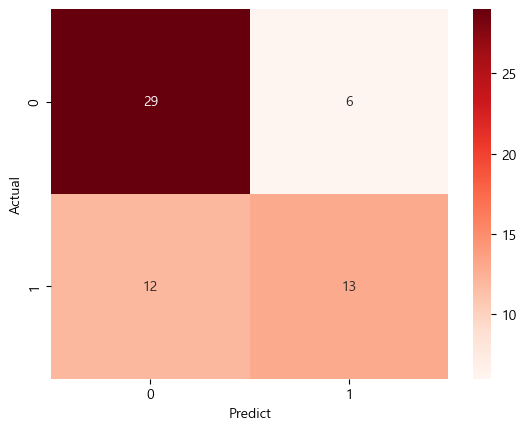

In [49]:
print("Random Forest:")
print(classification_report(y_test, RFpred))
sns.heatmap(confusion_matrix(y_test, RFpred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def evaluate_model(y_true, y_pred, y_pred_proba):
    # ROC 커브
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall 커브
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    
    # 시각화
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    
    plt.tight_layout()
    plt.show()

In [ ]:
LRpred_proba = LRmodel.predict_proba(X_test)
LR_ev = evaluate_model(y_test, LRpred, LRpred_proba)

In [ ]:
SGDpred_proba = SGDmodel.predict_proba(X_test)
SGD_ev = evaluate_model(y_test, SGDpred, SGDpred_proba)

In [ ]:
KNpred_proba = KNmodel.predict_proba(X_test)
KN_ev = evaluate_model(y_test, KNpred, KNpred_proba)

In [ ]:
DTpred_proba = DTmodel.predict_proba(X_test)
DT_ev = evaluate_model(y_test, DTpred, DTpred_proba)

In [ ]:
RFpred_proba = RFmodel.predict_proba(X_test)
RF_ev = evaluate_model(y_test, RFpred, RFpred_proba)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 계층적 K-fold 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR_cv_scores = cross_val_score(LRmodel, X, y, cv=skf, scoring='roc_auc')
SGD_cv_scores = cross_val_score(SGDmodel, X, y, cv=skf, scoring='roc_auc')
KN_cv_scores = cross_val_score(KNmodel, X, y, cv=skf, scoring='roc_auc')
DT_cv_scores = cross_val_score(DTmodel, X, y, cv=skf, scoring='roc_auc')
RF_cv_scores = cross_val_score(RFmodel, X, y, cv=skf, scoring='roc_auc')

print(LR_cv_scores)
print(SGD_cv_scores)
print(KN_cv_scores)
print(DT_cv_scores)
print(RF_cv_scores)

- GridSearchCV를 사용하여 하이퍼파라미터 튜닝

최적 하이퍼파라미터:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression (최적 모델):
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



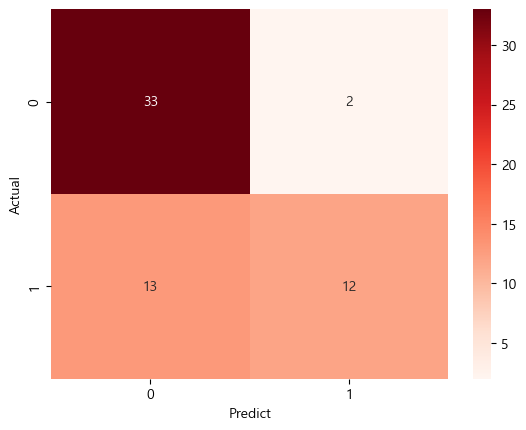

In [50]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 딕셔너리 정의
LR_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV 객체 생성
LR_grid_search = GridSearchCV(estimator=LRmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# 하이퍼파라미터 튜닝 수행
LR_grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:")
print(LR_grid_search.best_params_)

# 최적 모델 평가
LR_best_model = LR_grid_search.best_estimator_
LR_best_pred = LR_best_model.predict(X_test)

# 최적 모델 평가 결과 출력
print("Logistic Regression (최적 모델):")
print(classification_report(y_test, LR_best_pred))
sns.heatmap(confusion_matrix(y_test, LR_best_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()


최적 하이퍼파라미터:
{'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l1'}
Stochastic Gradient Descent (최적 모델):
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.70      0.64      0.67        25

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60



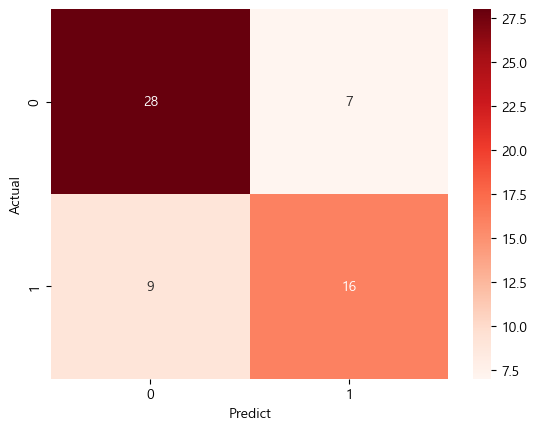

In [ ]:
SGD_param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
SGD_grid_search = GridSearchCV(estimator=SGDmodel, param_grid=SGD_param_grid, cv=5, scoring='accuracy')
SGD_grid_search.fit(X_train, y_train)
SGD_best_model = SGD_grid_search.best_estimator_
SGD_best_pred = SGD_best_model.predict(X_test)

print("최적 하이퍼파라미터:")
print(SGD_grid_search.best_params_)
print("Stochastic Gradient Descent (최적 모델):")
print(classification_report(y_test, SGD_best_pred))
sns.heatmap(confusion_matrix(y_test, SGD_best_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

최적 하이퍼파라미터:
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
K-Nearest Neighbors (최적 모델):
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



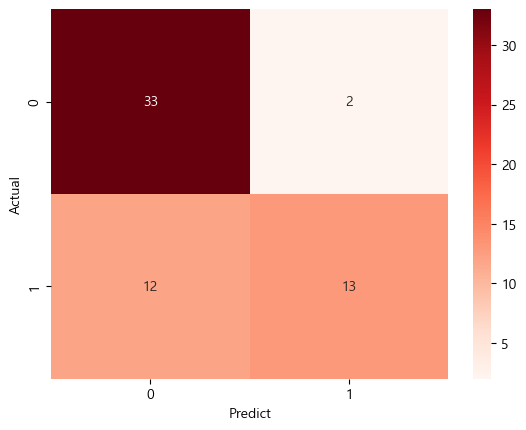

In [ ]:
KNN_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
KNN_grid_search = GridSearchCV(estimator=KNmodel, param_grid=KNN_param_grid, cv=5, scoring='accuracy')
KNN_grid_search.fit(X_train, y_train)
KNN_best_model = KNN_grid_search.best_estimator_
KNN_best_pred = KNN_best_model.predict(X_test)

print("최적 하이퍼파라미터:")
print(KNN_grid_search.best_params_)
print("K-Nearest Neighbors (최적 모델):")
print(classification_report(y_test, KNN_best_pred))
sns.heatmap(confusion_matrix(y_test, KNN_best_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

최적 하이퍼파라미터:
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 6}
Decision Tree (최적 모델):
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



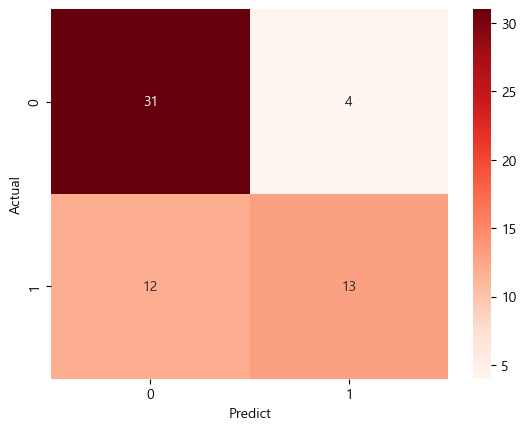

In [57]:
DT_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
DT_grid_search = GridSearchCV(estimator=DTmodel, param_grid=DT_param_grid, cv=5, scoring='accuracy')
DT_grid_search.fit(X_train, y_train)
DT_best_model = DT_grid_search.best_estimator_
DT_best_pred = DT_best_model.predict(X_test)

print("최적 하이퍼파라미터:")
print(DT_grid_search.best_params_)
print("Decision Tree (최적 모델):")
print(classification_report(y_test, DT_best_pred))
sns.heatmap(confusion_matrix(y_test, DT_best_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

최적 하이퍼파라미터:
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
Random Forest (최적 모델):
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60



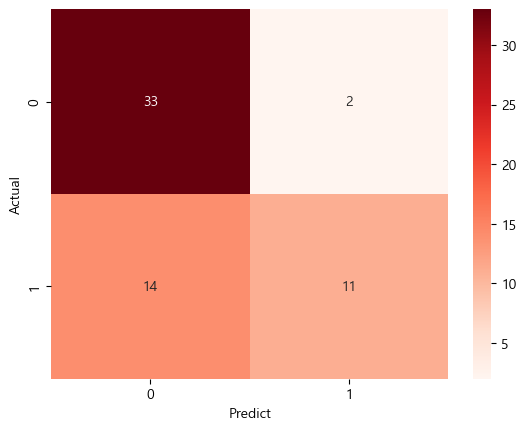

In [58]:
RF_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
RF_grid_search = GridSearchCV(estimator=RFmodel, param_grid=RF_param_grid, cv=5, scoring='accuracy')
RF_grid_search.fit(X_train, y_train)
RF_best_model = RF_grid_search.best_estimator_
RF_best_pred = RF_best_model.predict(X_test)

print("최적 하이퍼파라미터:")
print(RF_grid_search.best_params_)
print("Random Forest (최적 모델):")
print(classification_report(y_test, RF_best_pred))
sns.heatmap(confusion_matrix(y_test, RF_best_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
# 앙상블 모델 생성
ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42)),
        ('sgd', SGDClassifier(random_state=42))
    ],
    voting='soft'
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'alpha': uniform(0.0001, 0.1),
    'l1_ratio': uniform(0.1, 0.9),
    'eta0': uniform(0.01, 0.1),
    'max_iter': randint(1000, 2000)
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)